<a href="https://colab.research.google.com/github/tau797/Knigi24/blob/main/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Одним из интересных примеров практического применения машинного обучения является прогноз погодных условий (температуры воздуха, силы ветра, наличия осадков, и пр.), в конкретной местности со знанием географических координат и исторических данных о погоде.

Разберем применение такого базового метода машинного обучения, как линейная регрессия, на примере прогноза осадков в г. Остин (штат Техас).



Линейная регрессия подразумевает, что мы просто считаем, что имеет место линейная зависимость (для простейшего случая зависимости от одной переменной формула y=a*x+b), графически отражаемая прямой линией.

**Замечание**. Интересно происхождение термина. Почему "регрессия"? Это же синоним слова "деградация", "спад"? На самом деле, имела место примерно следующая история. В былые времена человечество не продуцировало данные настолько неимоверным потоком, как сейчас (по некоторым оценкам, в 2023 году было накоплено зетабайт информации). Ученые-статистики довольствовались не столь богатыми источниками данных. Однако, достаточно стабильным поставщиком здесь являлись военные. В частности, издавна измерялись основные параметры призывников, такие, как рост, вес, и пр.
Ученый ... изучал данные о росте призывников.
Как вам думается, у более рослых родителей и дети повыше ростом? Это - естественное предположение, и, несмотря на то, что процесс, конечно, имеет случайный характер, в среднем статистически это так. Но!
Обнаружилось, что сила отклонения от средних значений роста у детей обычно *меньше*, нежели у их отцов. Иными словами, имеет место снижение, или **регрессия**, отклонения.

Прогнозирование осадков - это применение науки и технологий для прогнозирования количества осадков в регионе. Важно точно определить количество осадков для эффективного использования водных ресурсов, урожайности сельскохозяйственных культур и предварительного планирования водных сооружений. В этой статье мы будем использовать линейную регрессию для прогнозирования количества осадков. Линейная регрессия показывает, сколько дюймов осадков мы можем ожидать. Набор данных представляет собой общедоступный набор данных о погоде в Остине, Техас, доступный на Kaggle ( https://www.kaggle.com/datasets/grubenm/austin-weather)

Для обучения модели нам нужно найти значения коэффициентов, которые минимизируют разницу между прогнозируемыми значениями и фактическими значениями в обучающем наборе. Это делается путем минимизации среднеквадратичной ошибки (MSE) с использованием градиентного спуска или какого-либо другого алгоритма оптимизации.
После того, как модель была обучена, ее можно использовать для прогнозирования количества осадков для новых входных значений.
Производительность модели можно оценить с использованием различных показателей, таких как коэффициент детерминации (R^2), среднеквадратичная ошибка (MSE) и среднеквадратичная ошибка (RMSE).

In [129]:
# используемые библиотеки
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# чтение изначальных данных
data = pd.read_csv('austin_weather.csv')

# первичное ознакомление с данными
data.info()
data.head(7).T

# смотрим число пропусков в данных
#data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

,0,1,2,3,4,5,6
Date,2013-12-21,2013-12-22,2013-12-23,2013-12-24,2013-12-25,2013-12-26,2013-12-27
TempHighF,74,56,58,61,58,57,60
TempAvgF,60,48,45,46,50,48,53
TempLowF,45,39,32,31,41,39,45
DewPointHighF,67,43,31,36,44,39,41
DewPointAvgF,49,36,27,28,40,36,39
DewPointLowF,43,28,23,21,36,33,37
HumidityHighPercent,93,93,76,89,86,79,83
HumidityAvgPercent,75,68,52,56,71,63,65
HumidityLowPercent,57,43,27,22,56,47,47


Что здесь есть. Давайте разберемся. В таблице более 1100 строк. В столбцах информация:

 1   TempHighF - температура максимальная (в Фаренгейтах) \\
 2   TempAvgF  - температура средняя \\
 3   TempLowF  - температура минимальная \\
 4   DewPointHighF  - точка росы, температура максимальная \\
 5   DewPointAvgF   - точка росы, температура средняя \\
 6   DewPointLowF   - точка росы, температура минимальная \\
 7   HumidityHighPercent - влажность в процентах максимальная \\
 8   HumidityAvgPercent  - влажность в процентах средняя \\
 9   HumidityLowPercent  - влажность в процентах минимальная \\
 10  SeaLevelPressureHighInches  - давление на уровне моря максимальное \\
 11  SeaLevelPressureAvgInches   - давление на уровне моря среднее \\
 12  SeaLevelPressureLowInches   - давление на уровне моря минимальное \\
 13  VisibilityHighMiles         - видимость, на макс.дальность в милях \\
 14  VisibilityAvgMiles          - видимость в среднем \\
 15  VisibilityLowMiles          - видимость, на мин.дальность \\
 16  WindHighMPH                 - сила ветра, миль в час максимальная \\
 17  WindAvgMPH                  - сила ветра средняя \\
 18  WindGustMPH                 - сила порывов ветра \\
 19  PrecipitationSumInche       - уровень осадков в дюймах \\

Пусть нас не смущают все эти принятые в англосасконских странах странные единицы измерения - мили, дюймы, градусы Фаренгейта. Для целей машинного обучения это неважно.

Важно, что нас интересует (**целевая** переменная) столбец с уровнем осадков.
А все остальные параметры могут быть использованы для прогнозирования ("*зависимые* переменные")

Важно ещё, что многие количественные данные почему-то представлены, как строки (тип 'object'). Лучше их преобразовать в числа с плавающей точкой с помощью функции astype(float).



In [130]:
# удаляем ненужные столбцы
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches','SeaLevelPressureLowInches'], axis=1)



In [131]:
# некоторые значения имеют букву «T», которая обозначает незначительное количество осадков.
# для использования в наших целях заменяем T на 0
data = data.replace('T', 0.0)

# некоторые параметры включают также '-' когда данные были недоступны
# их аналогично заменяем нулями
data = data.replace('-', 0.0)

data = data.astype(float)

data.info()

# сохраняем данные в новый файл
data.to_csv('austin_final.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TempHighF                  1319 non-null   float64
 1   TempAvgF                   1319 non-null   float64
 2   TempLowF                   1319 non-null   float64
 3   DewPointHighF              1319 non-null   float64
 4   DewPointAvgF               1319 non-null   float64
 5   DewPointLowF               1319 non-null   float64
 6   HumidityHighPercent        1319 non-null   float64
 7   HumidityAvgPercent         1319 non-null   float64
 8   HumidityLowPercent         1319 non-null   float64
 9   SeaLevelPressureAvgInches  1319 non-null   float64
 10  VisibilityHighMiles        1319 non-null   float64
 11  VisibilityAvgMiles         1319 non-null   float64
 12  VisibilityLowMiles         1319 non-null   float64
 13  WindHighMPH                1319 non-null   float

Разделяем набор данных на обучающую и проверочную части

In [117]:
# убираем лишнее, оставляя для проверки
data_prov = data.iloc[:200]
data = data.iloc[:-200]


Обучаем модель линейной регрессии на очищенных данных

In [132]:
# используемые библиотеки
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# чтение очищенных данных
data = pd.read_csv("austin_final.csv")

# значения вектора X используются для обучения
# модели линейной регрессии - независимые переменные,
# уровень осадков - целевое значение, мы его пока убираем
X = data.drop(['PrecipitationSumInches'], axis=1)

# И уровень осадков задаем как целевую переменную
Y = data['PrecipitationSumInches']

# преобразуем данные в вектор для целей алгоритма
Y = Y.values.reshape(-1, 1)

# инициализируем алгоритм линейной регрессии из библиотеки sklearn
clf = LinearRegression()

# обучаем модель
clf.fit(X, Y)

#подаем на вход обученной модели некоторые данные в виде
# числового вектора, для получения предсказания
# - значения всех параметров набора данных
input = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],[57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = input.reshape(1,-1)

# переводим в метрические единицы и печатаем прогноз
print('Предсказанный уровень осадков:', clf.predict(inp))
mm = float( clf.predict(inp))*25.4
print(f'Предсказанный уровень осадков (в миллиметрах): {mm:.1f}')



Предсказанный уровень осадков: [[1.33868402]]
Предсказанный уровень осадков (в миллиметрах): 34.0


Но это ещё не всё. Хорошим тоном при использовании методов машинного обучения на практике является оценка точности построенной модели на данных, отличных от использованных при обучении.
При этом используется ряд мер точности модели, такие как accuracy, precision, среднестатистическое отклонение (MSE – mean square error), и др.


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# чтение подготовленных данных
data = pd.read_csv("austin_final.csv")

data.info()

# берем зависимые переменные как вход
x = data.drop(['PrecipitationSumInches'], axis=1)

# и осадки как выход
y = data['PrecipitationSumInches']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression().fit(x_train, y_train)

y_pred = model.predict(x_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1319 non-null   int64  
 1   TempHighF                  1319 non-null   float64
 2   TempAvgF                   1319 non-null   float64
 3   TempLowF                   1319 non-null   float64
 4   DewPointHighF              1319 non-null   float64
 5   DewPointAvgF               1319 non-null   float64
 6   DewPointLowF               1319 non-null   float64
 7   HumidityHighPercent        1319 non-null   float64
 8   HumidityAvgPercent         1319 non-null   float64
 9   HumidityLowPercent         1319 non-null   float64
 10  SeaLevelPressureAvgInches  1319 non-null   float64
 11  VisibilityHighMiles        1319 non-null   float64
 12  VisibilityAvgMiles         1319 non-null   float64
 13  VisibilityLowMiles         1319 non-null   float

Оценим качество работы модели

In [141]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('среднеквадратичная ошибка mse: %.2f, абсолютная ошибка mae: %.2f' % (mse, mae))

среднеквадратичная ошибка mse: 0.16, абсолютная ошибка mae: 0.20


In [120]:
#data_prov.head(51)

Y_F =  data_prov['PrecipitationSumInches']
Y_F = Y_F.iloc[:20]
#print(Y_F)

Y_pred = []
X = data_prov
X = X.iloc[:20]
X = X.drop('PrecipitationSumInches',axis = 1)

X_v = X.to_numpy()
print(X_v)

# # добавляем столбец с предсказанным уровнем осадков
# for index, row in X.iterrows ():
#    print('обрабатываем: ',row,'\n')
#    X_v = row.to_numpy()
#    print("Numpy:",X_v)
#    X_v.reshape(1,-1)
#    print("после reshape:",X_v)
#    y_pred = clf.predict(X_v)
#    Y_pred.append(float(y_pred))

# #data_prov['PredOsad'] = Y_pred

# print("факт:",Y_F)
# print("предсказание:",Y_pred)

#data_prov.head(21)
#data_prov['PredOsad'] = data_prov. apply (data_prov. apply (clf.predict.reshape(1,-1), axis = 1 ) )

# добавляем столбец с абсолютным значением разницы между фактом и предсказанным значением
#data_prov['Error'] = data_prov.apply(lambda err: abs(PrecipitationSumInches-PredOsad, axis = 1))
#data_prov['PrecipitationSumInches','PredOsad','Error'].head(21)


[[74.   60.   45.   67.   49.   43.   93.   75.   57.   29.68 10.    7.
   2.   20.    4.   31.  ]
 [56.   48.   39.   43.   36.   28.   93.   68.   43.   30.13 10.   10.
   5.   16.    6.   25.  ]
 [58.   45.   32.   31.   27.   23.   76.   52.   27.   30.49 10.   10.
  10.    8.    3.   12.  ]
 [61.   46.   31.   36.   28.   21.   89.   56.   22.   30.45 10.   10.
   7.   12.    4.   20.  ]
 [58.   50.   41.   44.   40.   36.   86.   71.   56.   30.33 10.   10.
   7.   10.    2.   16.  ]
 [57.   48.   39.   39.   36.   33.   79.   63.   47.   30.4  10.    9.
   7.   12.    3.   17.  ]
 [60.   53.   45.   41.   39.   37.   83.   65.   47.   30.39 10.    9.
   7.    7.    1.   11.  ]
 [62.   51.   40.   43.   39.   33.   92.   64.   36.   30.17 10.   10.
   7.   10.    2.   14.  ]
 [64.   50.   36.   49.   41.   28.   92.   76.   60.   30.1  10.   10.
   4.   17.    5.   24.  ]
 [44.   40.   35.   31.   26.   21.   75.   60.   45.   30.33 10.   10.
  10.   13.    5.   21.  ]
 [55.   46

График тенденции осадков: 


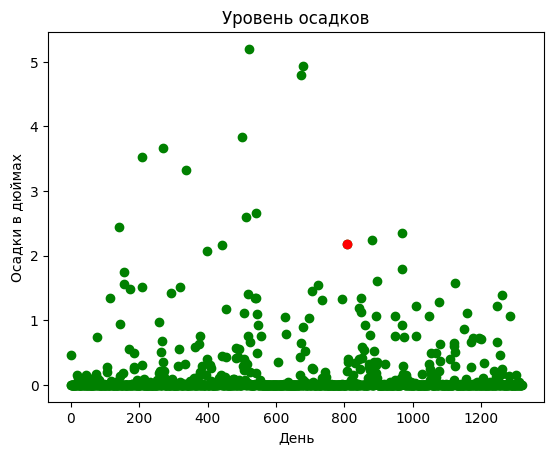

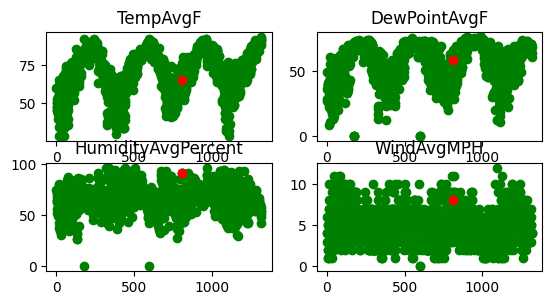

In [133]:
# выбираем случайно некоторый день из набора данных
day_index = 809
days = [i for i in range(Y.size)]

# построение графика зависимости уровней осадков от общего количества дней
# отслеживается один день, выделенный красным. Здесь выпадает ок. двух дюймов,
# это много - примерно пять сантиметров!
print("График тенденции осадков: ")
plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title("Уровень осадков")
plt.xlabel("День")
plt.ylabel("Осадки в дюймах")
plt.show()

x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'WindAvgMPH'], axis=1)

# построение графика с несколькими признаками (значениями x)
# и осадков или дождя, чтобы наблюдать тенденции
# print("График зависимости осадков от некоторых параметров: ")
plt.title("Зависимость осадков от выделенных параметров")
for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color='r')
    plt.title(x_vis.columns.values[i])

plt.show()
